# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


Starting Simulation...
Simulation Complete.


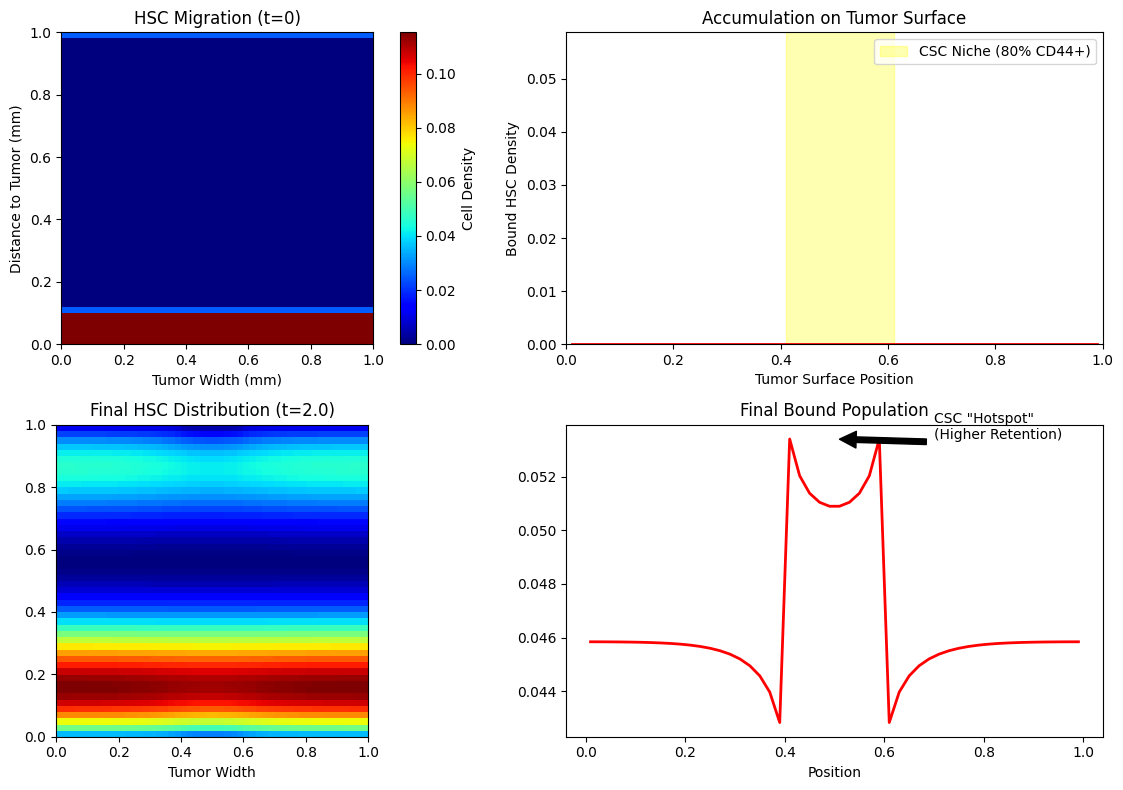

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm

# ==========================================
# 1. MODEL PARAMETERS & DOMAIN SETUP
# ==========================================

# Grid and Time settings
Nx, Ny = 50, 50           # Grid size (50x50 cells)
Lx, Ly = 1.0, 1.0         # Physical dimensions (mm)
dx, dy = Lx/Nx, Ly/Ny     # Cell size
T_final = 2.0             # Total simulation time
dt = 0.001                # Time step (stability condition: dt < dx^2 / 4*D)
Nt = int(T_final / dt)    # Number of time steps

# Coordinates
x = np.linspace(dx/2, Lx-dx/2, Nx)
y = np.linspace(dy/2, Ly-dy/2, Ny)
X, Y = np.meshgrid(x, y)

# Biological Parameters
Du = 0.01      # Random motility of HSCs
Dc = 0.1       # Diffusion of Chemoattractant (EpCAM/MUC1/Claudin-7)
chi0 = 0.15    # Base chemotactic sensitivity
alpha = 0.5    # CD44 upregulation rate
beta = 0.2     # CD44 shedding rate
k_on = 10.0    # Binding affinity at tumor surface
k_off = 0.1    # Detachment rate
B_max = 10.0   # Maximum binding capacity of tumor sites

# Initial Conditions
u = np.zeros((Ny, Nx))    # HSC Density (free)
c = np.zeros((Ny, Nx))    # Chemoattractant Concentration
rho = np.zeros((Ny, Nx))  # CD44 Receptor Density on HSCs
b = np.zeros(Nx)          # Bound HSCs on the Tumor Boundary (Top Edge)

# Set initial blob of HSCs at the bottom (Far-field/Blood Vessel)
u[0:5, :] = 1.0
rho[0:5, :] = 0.1 # Low initial CD44 expression

# ==========================================
# 2. TUMOR HETEROGENEITY (YOUR HYPOTHESIS)
# ==========================================
# We define the top boundary (y=Ly) as the Tumor Margin.
# psi represents Tumor CD44 positivity: 0.8 for CSCs, 0.6 for Bulk.

psi = np.zeros(Nx)
# Middle section acts as Cancer Stem Cell (CSC) niche
csc_start, csc_end = int(0.4*Nx), int(0.6*Nx)

psi[:] = 0.6          # Bulk Cancer (60% CD44+)
psi[csc_start:csc_end] = 0.8  # CSC Niche (80% CD44+) - The "Hotspot"

# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================

def update_chemoattractant(c, u, dt):
    """
    Solves Diffusion-Reaction for soluble factors (c).
    Source: Tumor boundary (Top). Sink: Consumption by HSCs.
    """
    # Diffusion (Central Difference)
    laplacian = (np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) +
                 np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) - 4*c) / dx**2

    # Boundary Conditions (Neumann 0 everywhere except Source at Top)
    # Top boundary acts as source (Tumor secreting EpCAM/MUC1)
    # We impose a fixed flux or value at the top ghost cells
    source_term = np.zeros_like(c)
    source_term[-1, :] += 5.0 # Production at tumor margin

    # Reaction: Consumption by HSCs (-gamma * u * c)
    gamma = 1.0
    reaction = -gamma * u * c

    return c + dt * (Dc * laplacian + reaction + source_term)

def update_hsc_transport(u, c, rho, dt):
    """
    Solves Advection-Diffusion for HSCs (u).
    Uses Upwind Scheme for chemotaxis to preserve positivity.
    """
    # 1. Calculate Gradients of Chemoattractant (Central Diff)
    grad_cx = (np.roll(c, -1, axis=1) - np.roll(c, 1, axis=1)) / (2*dx)
    grad_cy = (np.roll(c, -1, axis=0) - np.roll(c, 1, axis=0)) / (2*dy)

    # 2. Calculate Effective Chemotactic Velocity: v = chi(rho) * grad_c
    # Sensitivity depends on receptor density rho! (Plasticity)
    chi_eff = chi0 * rho
    vx = chi_eff * grad_cx
    vy = chi_eff * grad_cy

    # 3. Upwind Advection Fluxes
    # Flux X
    F_adv_x = np.zeros_like(u)
    flow_right = (vx > 0)
    flow_left = (vx < 0)
    F_adv_x[:, :-1] = (flow_right[:, :-1] * u[:, :-1] * vx[:, :-1] +
                       flow_left[:, :-1] * u[:, 1:] * vx[:, :-1])

    # Flux Y
    F_adv_y = np.zeros_like(u)
    flow_up = (vy > 0)
    flow_down = (vy < 0)
    F_adv_y[:-1, :] = (flow_up[:-1, :] * u[:-1, :] * vy[:-1, :] +
                       flow_down[:-1, :] * u[1:, :] * vy[:-1, :])

    # 4. Advection Update (Divergence of Flux)
    adv_term = - ( (F_adv_x - np.roll(F_adv_x, 1, axis=1))/dx +
                   (F_adv_y - np.roll(F_adv_y, 1, axis=0))/dy )

    # 5. Diffusion Update
    diff_term = Du * (np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) +
                      np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) - 4*u) / dx**2

    return u + dt * (diff_term + adv_term)

# ==========================================
# 4. MAIN SIMULATION LOOP
# ==========================================

print("Starting Simulation...")

history_u = [] # Store frames for animation
history_b = []

for n in range(Nt):

    # A. Update Chemoattractant Field
    c = update_chemoattractant(c, u, dt)

    # B. Update CD44 Receptor Density (Plasticity)
    # Advection of rho follows cells + Reaction (Upregulation/Shedding)
    # Simplified here to Reaction-Diffusion on the moving field for stability
    rho_reaction = alpha * c - beta * rho
    rho = rho + dt * rho_reaction
    # Cap rho to realistic biological limits
    rho = np.clip(rho, 0, 1.0)

    # C. Update HSC Density (The Migration)
    u_new = update_hsc_transport(u, c, rho, dt)

    # D. BOUNDARY DYNAMICS (The "Lock" Mechanism)
    # Calculate flux hitting the top boundary (Tumor)
    # Only cells in the top row (u[-1, :]) interact with the boundary

    # Rate of binding = k_on * Tumor_CD44(psi) * HSC_CD44(rho) * Free_Sites
    binding_flux = k_on * psi * rho[-1, :] * u[-1, :] * (1 - b/B_max) * dt
    detachment_flux = k_off * b * dt

    # Update Bound Cells (ODE)
    b_new = b + binding_flux - detachment_flux

    # Remove bound cells from the free population in the top row
    u_new[-1, :] -= binding_flux / dy # Convert flux to density change

    # Add detached cells back to free population
    u_new[-1, :] += detachment_flux / dy

    u = np.maximum(u_new, 0) # Enforce positivity
    b = np.maximum(b_new, 0)

    # Store frames every 100 steps
    if n % 50 == 0:
        history_u.append(u.copy())
        history_b.append(b.copy())

print("Simulation Complete.")

# ==========================================
# 5. VISUALIZATION
# ==========================================

fig = plt.figure(figsize=(12, 8))

# Subplot 1: Migration Map (2D Heatmap)
ax1 = fig.add_subplot(2, 2, 1)
im1 = ax1.imshow(history_u[0], origin='lower', extent=[0, Lx, 0, Ly],
                 cmap='jet', vmin=0, vmax=np.max(history_u[-1]))
ax1.set_title(f'HSC Migration (t=0)')
ax1.set_xlabel('Tumor Width (mm)')
ax1.set_ylabel('Distance to Tumor (mm)')
fig.colorbar(im1, ax=ax1, label='Cell Density')
fig.savefig("my_image_initial.jpg") # Changed img.save to fig.savefig

# Subplot 2: Tumor Surface Accumulation (1D Line Plot)
ax2 = fig.add_subplot(2, 2, 2)
line, = ax2.plot(x, history_b[0], 'r-', linewidth=2)
ax2.set_ylim(0, np.max(history_b)*1.1 if np.max(history_b) > 0 else 1)
ax2.set_xlim(0, Lx)
ax2.set_title('Accumulation on Tumor Surface')
ax2.set_xlabel('Tumor Surface Position')
ax2.set_ylabel('Bound HSC Density')
ax2.fill_between(x, 0, 1, where=(x >= x[csc_start]) & (x <= x[csc_end]),
                 color='yellow', alpha=0.3, label='CSC Niche (80% CD44+)')
ax2.legend()

# Subplot 3: Final State (Static)
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(history_u[-1], origin='lower', extent=[0, Lx, 0, Ly], cmap='jet')
ax3.set_title(f'Final HSC Distribution (t={T_final})')
ax3.set_xlabel('Tumor Width')

# Subplot 4: Final Bound Profile (Static)
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, history_b[-1], 'r-', linewidth=2)
ax4.set_title('Final Bound Population')
ax4.set_xlabel('Position')
# Highlight the CSC Peak
ax4.annotate('CSC "Hotspot"\n(Higher Retention)',
             xy=(0.5, np.max(history_b[-1])),
             xytext=(0.7, np.max(history_b[-1])),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

# (Optional) To save the animation, you would uncomment the following lines:
# def animate(i):
#     im1.set_array(history_u[i])
#     ax1.set_title(f'HSC Migration (Frame {i})')
#     line.set_ydata(history_b[i])
#     return im1, line
# anim = animation.FuncAnimation(fig, animate, frames=len(history_u), interval=50)
# anim.save('tnbc_hsc_migration.mp4', writer='ffmpeg')
fig.savefig("my_image_final.jpg") # Changed img.save to fig.savefig

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os  # Added to handle directory paths

# ==========================================
# 0. OUTPUT DIRECTORY SETUP
# ==========================================
# Use a raw string (r"...") to handle backslashes in Windows paths safely
output_dir = r"C:\Research\PhD\Manuscript in progress\Research Articles\203_Mathematical modeling"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"Figures will be saved to: {output_dir}")

# ==========================================
# 1. MODEL PARAMETERS & DOMAIN SETUP
# ==========================================

# Grid and Time settings
Nx, Ny = 50, 50           # Grid size (50x50 cells)
Lx, Ly = 1.0, 1.0         # Physical dimensions (mm)
dx, dy = Lx/Nx, Ly/Ny     # Cell size
T_final = 2.0             # Total simulation time
dt = 0.001                # Time step
Nt = int(T_final / dt)    # Number of time steps

# Coordinates
x = np.linspace(dx/2, Lx-dx/2, Nx)
y = np.linspace(dy/2, Ly-dy/2, Ny)
X, Y = np.meshgrid(x, y)

# Biological Parameters
Du = 0.01      # Random motility of HSCs
Dc = 0.1       # Diffusion of Chemoattractant
chi0 = 0.15    # Base chemotactic sensitivity
alpha = 0.5    # CD44 upregulation rate
beta = 0.2     # CD44 shedding rate
k_on = 10.0    # Binding affinity
k_off = 0.1    # Detachment rate
B_max = 10.0   # Max binding capacity

# Initial Conditions
u = np.zeros((Ny, Nx))    # HSC Density
c = np.zeros((Ny, Nx))    # Chemoattractant
rho = np.zeros((Ny, Nx))  # CD44 Density
b = np.zeros(Nx)          # Bound HSCs

# Set initial blob of HSCs at the bottom
u[0:5, :] = 1.0
rho[0:5, :] = 0.1

# ==========================================
# 2. TUMOR HETEROGENEITY
# ==========================================
psi = np.zeros(Nx)
csc_start, csc_end = int(0.4*Nx), int(0.6*Nx)

psi[:] = 0.6                  # Bulk Cancer (60% CD44+)
psi[csc_start:csc_end] = 0.8  # CSC Niche (80% CD44+)

# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================

def update_chemoattractant(c, u, dt):
    laplacian = (np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) +
                 np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) - 4*c) / dx**2
    source_term = np.zeros_like(c)
    source_term[-1, :] += 5.0
    reaction = -1.0 * u * c
    return c + dt * (Dc * laplacian + reaction + source_term)

def update_hsc_transport(u, c, rho, dt):
    grad_cx = (np.roll(c, -1, axis=1) - np.roll(c, 1, axis=1)) / (2*dx)
    grad_cy = (np.roll(c, -1, axis=0) - np.roll(c, 1, axis=0)) / (2*dy)

    chi_eff = chi0 * rho
    vx = chi_eff * grad_cx
    vy = chi_eff * grad_cy

    F_adv_x = np.zeros_like(u)
    flow_right = (vx > 0)
    flow_left = (vx < 0)
    F_adv_x[:, :-1] = (flow_right[:, :-1] * u[:, :-1] * vx[:, :-1] +
                       flow_left[:, :-1] * u[:, 1:] * vx[:, :-1])

    F_adv_y = np.zeros_like(u)
    flow_up = (vy > 0)
    flow_down = (vy < 0)
    F_adv_y[:-1, :] = (flow_up[:-1, :] * u[:-1, :] * vy[:-1, :] +
                       flow_down[:-1, :] * u[1:, :] * vy[:-1, :])

    adv_term = - ( (F_adv_x - np.roll(F_adv_x, 1, axis=1))/dx +
                   (F_adv_y - np.roll(F_adv_y, 1, axis=0))/dy )

    # 5. Diffusion Update
    diff_term = Du * (np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) +
                      np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) - 4*u) / dx**2

    return u + dt * (diff_term + adv_term)

SyntaxError: '(' was never closed (ipython-input-204309788.py, line 94)

Starting Simulation...
Simulation Complete.


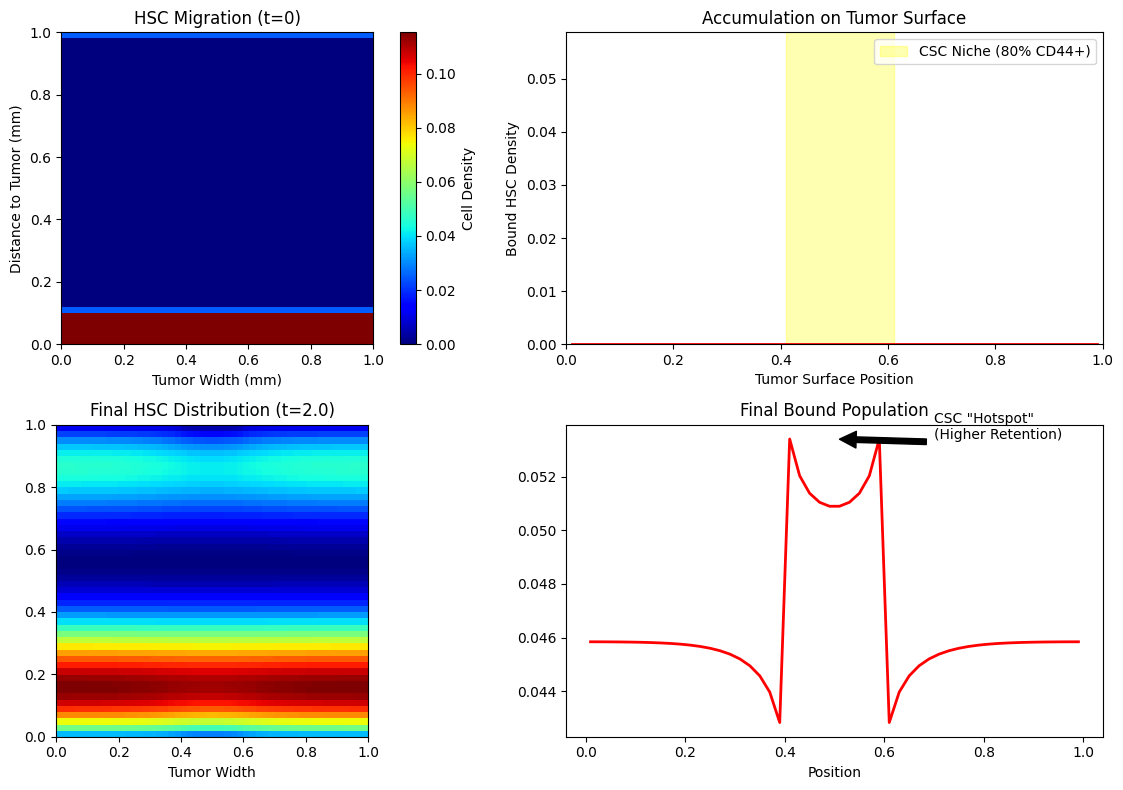

NameError: name 'tensor_img' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm

# ==========================================
# 1. MODEL PARAMETERS & DOMAIN SETUP
# ==========================================

# Grid and Time settings
Nx, Ny = 50, 50           # Grid size (50x50 cells)
Lx, Ly = 1.0, 1.0         # Physical dimensions (mm)
dx, dy = Lx/Nx, Ly/Ny     # Cell size
T_final = 2.0             # Total simulation time
dt = 0.001                # Time step (stability condition: dt < dx^2 / 4*D)
Nt = int(T_final / dt)    # Number of time steps

# Coordinates
x = np.linspace(dx/2, Lx-dx/2, Nx)
y = np.linspace(dy/2, Ly-dy/2, Ny)
X, Y = np.meshgrid(x, y)

# Biological Parameters
Du = 0.01      # Random motility of HSCs
Dc = 0.1       # Diffusion of Chemoattractant (EpCAM/MUC1/Claudin-7)
chi0 = 0.15    # Base chemotactic sensitivity
alpha = 0.5    # CD44 upregulation rate
beta = 0.2     # CD44 shedding rate
k_on = 10.0    # Binding affinity at tumor surface
k_off = 0.1    # Detachment rate
B_max = 10.0   # Maximum binding capacity of tumor sites

# Initial Conditions
u = np.zeros((Ny, Nx))    # HSC Density (free)
c = np.zeros((Ny, Nx))    # Chemoattractant Concentration
rho = np.zeros((Ny, Nx))  # CD44 Receptor Density on HSCs
b = np.zeros(Nx)          # Bound HSCs on the Tumor Boundary (Top Edge)

# Set initial blob of HSCs at the bottom (Far-field/Blood Vessel)
u[0:5, :] = 1.0
rho[0:5, :] = 0.1 # Low initial CD44 expression

# ==========================================
# 2. TUMOR HETEROGENEITY (YOUR HYPOTHESIS)
# ==========================================
# We define the top boundary (y=Ly) as the Tumor Margin.
# psi represents Tumor CD44 positivity: 0.8 for CSCs, 0.6 for Bulk.

psi = np.zeros(Nx)
# Middle section acts as Cancer Stem Cell (CSC) niche
csc_start, csc_end = int(0.4*Nx), int(0.6*Nx)

psi[:] = 0.6          # Bulk Cancer (60% CD44+)
psi[csc_start:csc_end] = 0.8  # CSC Niche (80% CD44+) - The "Hotspot"

# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================

def update_chemoattractant(c, u, dt):
    """
    Solves Diffusion-Reaction for soluble factors (c).
    Source: Tumor boundary (Top). Sink: Consumption by HSCs.
    """
    # Diffusion (Central Difference)
    laplacian = (np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) +
                 np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) - 4*c) / dx**2

    # Boundary Conditions (Neumann 0 everywhere except Source at Top)
    # Top boundary acts as source (Tumor secreting EpCAM/MUC1)
    # We impose a fixed flux or value at the top ghost cells
    source_term = np.zeros_like(c)
    source_term[-1, :] += 5.0 # Production at tumor margin

    # Reaction: Consumption by HSCs (-gamma * u * c)
    gamma = 1.0
    reaction = -gamma * u * c

    return c + dt * (Dc * laplacian + reaction + source_term)

def update_hsc_transport(u, c, rho, dt):
    """
    Solves Advection-Diffusion for HSCs (u).
    Uses Upwind Scheme for chemotaxis to preserve positivity.
    """
    # 1. Calculate Gradients of Chemoattractant (Central Diff)
    grad_cx = (np.roll(c, -1, axis=1) - np.roll(c, 1, axis=1)) / (2*dx)
    grad_cy = (np.roll(c, -1, axis=0) - np.roll(c, 1, axis=0)) / (2*dy)

    # 2. Calculate Effective Chemotactic Velocity: v = chi(rho) * grad_c
    # Sensitivity depends on receptor density rho! (Plasticity)
    chi_eff = chi0 * rho
    vx = chi_eff * grad_cx
    vy = chi_eff * grad_cy

    # 3. Upwind Advection Fluxes
    # Flux X
    F_adv_x = np.zeros_like(u)
    flow_right = (vx > 0)
    flow_left = (vx < 0)
    F_adv_x[:, :-1] = (flow_right[:, :-1] * u[:, :-1] * vx[:, :-1] +
                       flow_left[:, :-1] * u[:, 1:] * vx[:, :-1])

    # Flux Y
    F_adv_y = np.zeros_like(u)
    flow_up = (vy > 0)
    flow_down = (vy < 0)
    F_adv_y[:-1, :] = (flow_up[:-1, :] * u[:-1, :] * vy[:-1, :] +
                       flow_down[:-1, :] * u[1:, :] * vy[:-1, :])

    # 4. Advection Update (Divergence of Flux)
    adv_term = - ( (F_adv_x - np.roll(F_adv_x, 1, axis=1))/dx +
                   (F_adv_y - np.roll(F_adv_y, 1, axis=0))/dy )

    # 5. Diffusion Update
    diff_term = Du * (np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) +
                      np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) - 4*u) / dx**2

    return u + dt * (diff_term + adv_term)

# ==========================================
# 4. MAIN SIMULATION LOOP
# ==========================================

print("Starting Simulation...")

history_u = [] # Store frames for animation
history_b = []

for n in range(Nt):

    # A. Update Chemoattractant Field
    c = update_chemoattractant(c, u, dt)

    # B. Update CD44 Receptor Density (Plasticity)
    # Advection of rho follows cells + Reaction (Upregulation/Shedding)
    # Simplified here to Reaction-Diffusion on the moving field for stability
    rho_reaction = alpha * c - beta * rho
    rho = rho + dt * rho_reaction
    # Cap rho to realistic biological limits
    rho = np.clip(rho, 0, 1.0)

    # C. Update HSC Density (The Migration)
    u_new = update_hsc_transport(u, c, rho, dt)

    # D. BOUNDARY DYNAMICS (The "Lock" Mechanism)
    # Calculate flux hitting the top boundary (Tumor)
    # Only cells in the top row (u[-1, :]) interact with the boundary

    # Rate of binding = k_on * Tumor_CD44(psi) * HSC_CD44(rho) * Free_Sites
    binding_flux = k_on * psi * rho[-1, :] * u[-1, :] * (1 - b/B_max) * dt
    detachment_flux = k_off * b * dt

    # Update Bound Cells (ODE)
    b_new = b + binding_flux - detachment_flux

    # Remove bound cells from the free population in the top row
    u_new[-1, :] -= binding_flux / dy # Convert flux to density change

    # Add detached cells back to free population
    u_new[-1, :] += detachment_flux / dy

    u = np.maximum(u_new, 0) # Enforce positivity
    b = np.maximum(b_new, 0)

    # Store frames every 100 steps
    if n % 50 == 0:
        history_u.append(u.copy())
        history_b.append(b.copy())

print("Simulation Complete.")

# ==========================================
# 5. VISUALIZATION
# ==========================================

fig = plt.figure(figsize=(12, 8))

# Subplot 1: Migration Map (2D Heatmap)
ax1 = fig.add_subplot(2, 2, 1)
im1 = ax1.imshow(history_u[0], origin='lower', extent=[0, Lx, 0, Ly],
                 cmap='jet', vmin=0, vmax=np.max(history_u[-1]))
ax1.set_title(f'HSC Migration (t=0)')
ax1.set_xlabel('Tumor Width (mm)')
ax1.set_ylabel('Distance to Tumor (mm)')
fig.colorbar(im1, ax=ax1, label='Cell Density')

# Subplot 2: Tumor Surface Accumulation (1D Line Plot)
ax2 = fig.add_subplot(2, 2, 2)
line, = ax2.plot(x, history_b[0], 'r-', linewidth=2)
ax2.set_ylim(0, np.max(history_b)*1.1 if np.max(history_b) > 0 else 1)
ax2.set_xlim(0, Lx)
ax2.set_title('Accumulation on Tumor Surface')
ax2.set_xlabel('Tumor Surface Position')
ax2.set_ylabel('Bound HSC Density')
ax2.fill_between(x, 0, 1, where=(x >= x[csc_start]) & (x <= x[csc_end]),
                 color='yellow', alpha=0.3, label='CSC Niche (80% CD44+)')
ax2.legend()

# Subplot 3: Final State (Static)
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(history_u[-1], origin='lower', extent=[0, Lx, 0, Ly], cmap='jet')
ax3.set_title(f'Final HSC Distribution (t={T_final})')
ax3.set_xlabel('Tumor Width')

# Subplot 4: Final Bound Profile (Static)
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, history_b[-1], 'r-', linewidth=2)
ax4.set_title('Final Bound Population')
ax4.set_xlabel('Position')
# Highlight the CSC Peak
ax4.annotate('CSC "Hotspot"\n(Higher Retention)',
             xy=(0.5, np.max(history_b[-1])),
             xytext=(0.7, np.max(history_b[-1])),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

# (Optional) To save the animation, you would uncomment the following lines:
# def animate(i):
#     im1.set_array(history_u[i])
#     ax1.set_title(f'HSC Migration (Frame {i})')
#     line.set_ydata(history_b[i])
#     return im1, line
# anim = animation.FuncAnimation(fig, animate, frames=len(history_u), interval=50)
# anim.save('tnbc_hsc_migration.mp4', writer='ffmpeg')
import torch
from torchvision.utils import save_image
from google.colab import files

# Assuming 'tensor_img' is your image tensor (e.g., shape [3, 256, 256])
# Normalize if your tensor is not already between 0 and 1
save_image(tensor_img, 'pytorch_result.png')

files.download('pytorch_result.png')